 ## Welcome to dymoval's tutorial!
 
In this tutorial we show the main functionalities of *dymoval*.

Firstly, let's import some useful packages

In [1]:
import dymoval as dmv
import numpy as np
import matplotlib.pyplot as plt
import h5py
from copy import deepcopy
from itertools import product

Then, let's read the log data collected from experiments in the lab. 
We assume that data have been logged in hdf5 format and we use the h5py package to read it.
For more info check the h5py docs.

In [2]:
logs = h5py.File('./ElMotorLogs.h5', 'r')
logs.keys()

<KeysViewHDF5 ['signals']>

For this example, we assume that all the signals are logged in the group *signals*

In [3]:
logs["signals"].keys()

<KeysViewHDF5 ['V', 'dot_theta', 'ia', 'theta']>

We can extract the logged signals as it follows (see h5py docs for more info)

In [5]:
V = logs["signals/V"]
ia = logs["signals/ia"]
theta = logs["signals/theta"]
dot_theta = logs["signals/dot_theta"]

At this point we can cast the logs into *dymoval* `Signal`s. 

In [6]:
signal_list = []
for val in [V,ia,theta,dot_theta]:
    temp:dmv.Signal={
        "name" : val.attrs["name"].decode('utf-8'),
        "values" : val[:],
        "signal_unit" : val.attrs["unit"].decode('utf-8'),
        "sampling_period" : val.attrs["period"][0],
        "time_unit" : val.attrs["sampling_unit"].decode('utf-8'),
    }
    signal_list.append(deepcopy(temp))


... and we can take a look at them. 

(<Figure size 640x480 with 4 Axes>, <numpy.flatiter at 0x290c5bfcb90>)

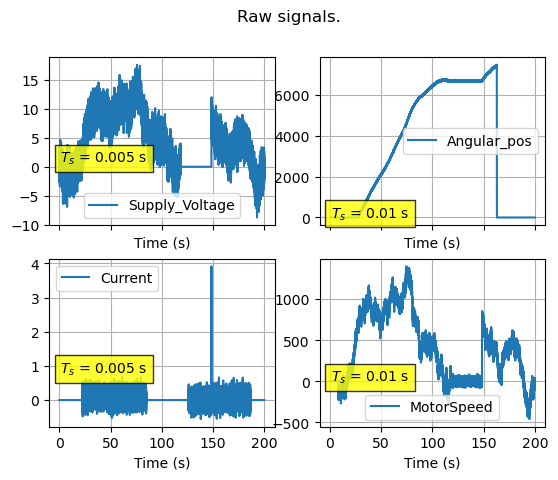

In [7]:
dmv.plot_signals(*signal_list)

Let's separate input and output...

In [8]:
signal_names = [s["name"] for s in signal_list]
u_names = signal_names[0]
y_names = signal_names[1:]
ds = dmv.Dataset(
    "ElMotor",
    signal_list,
    u_names,
    y_names,
    target_sampling_period=0.01,
    tin = 25.0,
    tout = 80.0,
)

In [9]:
ds.excluded_signals

[]

In [10]:
ds.sampling_period

0.01

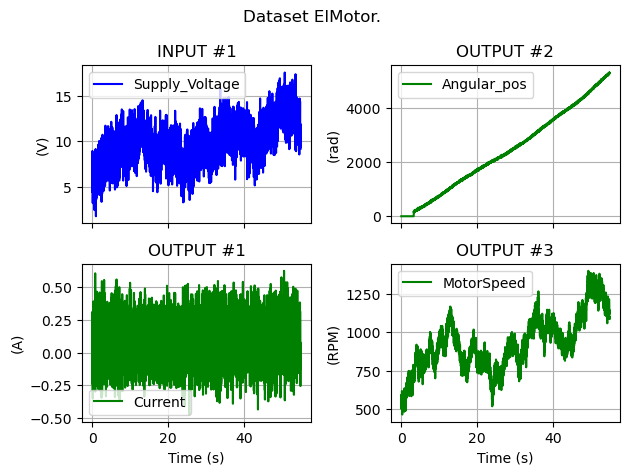

In [9]:
ds.plot()

(<numpy.flatiter at 0x131a381d770>, <numpy.flatiter at 0x131a3818d80>)

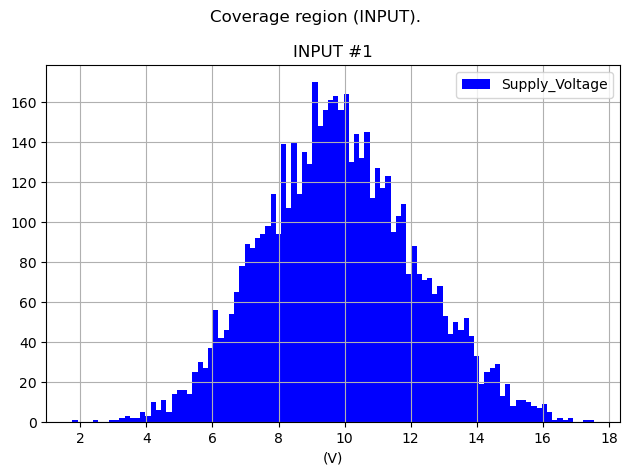

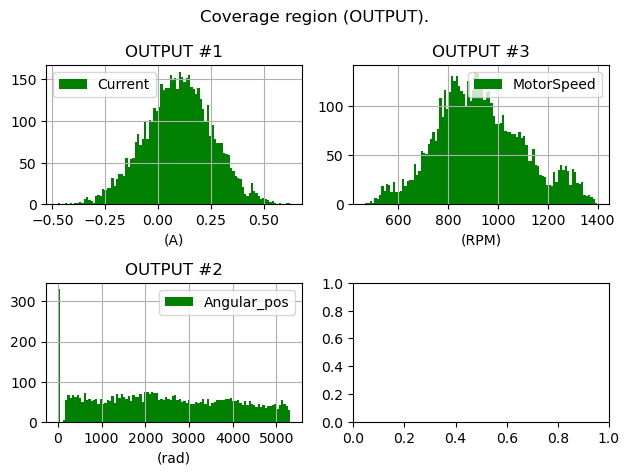

In [12]:
ds.plot_coverage()

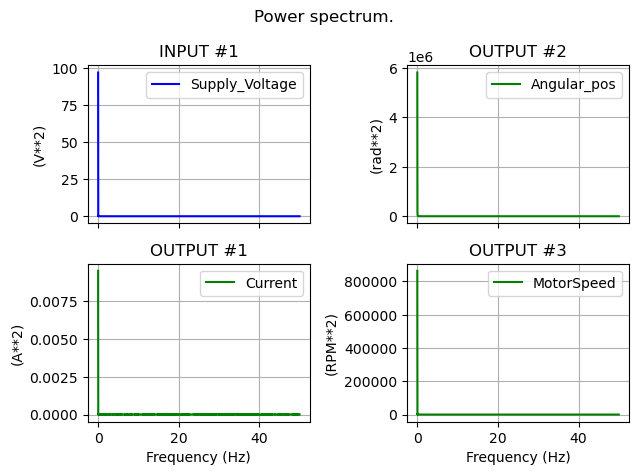

In [10]:
ds.plot_spectrum()

C:\VAS\github\dymoval\src\dymoval\dataset.py:1829: PerformanceWarning: indexing past lexsort depth may impact performance.
  u_filt = df_temp.loc[:, ("INPUT", u)].to_numpy()
C:\VAS\github\dymoval\src\dymoval\dataset.py:1836: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp.loc[:, ("INPUT", u)] = y_filt
C:\VAS\github\dymoval\src\dymoval\dataset.py:1846: PerformanceWarning: indexing past lexsort depth may impact performance.
  u_filt = df_temp.loc[:, ("OUTPUT", y)].to_numpy()
C:\VAS\github\dymoval\src\dymoval\dataset.py:1853: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp.loc[:, ("OUTPUT", y)] = y_filt


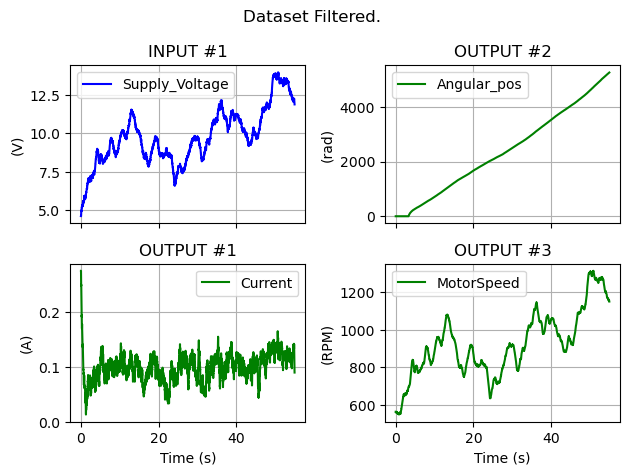

In [11]:
cutoff = 2.5  # [Hz]
signal_names = [s[1] for s in ds.signal_list()]
filter_bank = list(product(signal_names,[cutoff]))
ds_filt = ds.low_pass_filter(*filter_bank)
ds_filt.name = "Filtered"
ds_filt.plot()

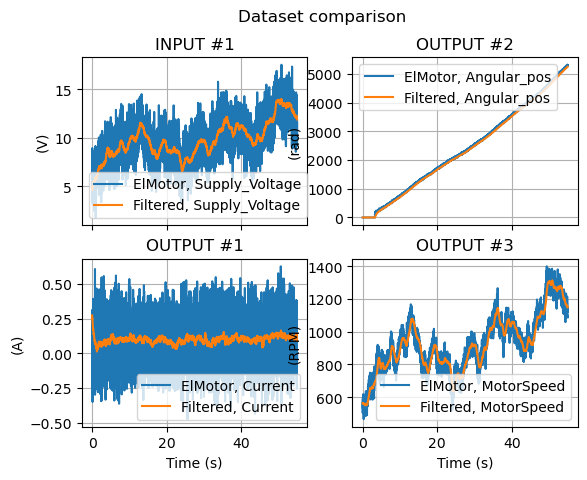

In [16]:
dmv.compare_datasets(ds,ds_filt)

In [17]:
mean_in, cov_in, mean_out, cov_out = ds.coverage
mean_out

names        units
Current      A           0.0974
Angular_pos  rad      2408.7492
MotorSpeed   RPM       929.3003
dtype: float64

In [18]:
cov_out

names              Current   Angular_pos   MotorSpeed
units                    A           rad          RPM
names       units                                    
Current     A       0.0256  1.552360e+01       2.6797
Angular_pos rad    15.5236  2.327087e+06  197320.5043
MotorSpeed  RPM     2.6797  1.973205e+05   31113.2013

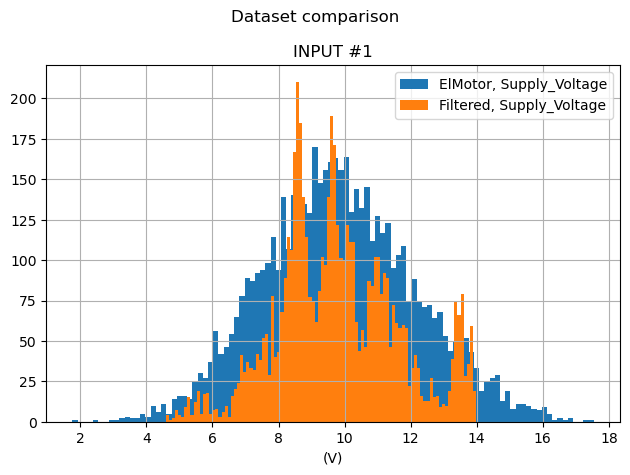

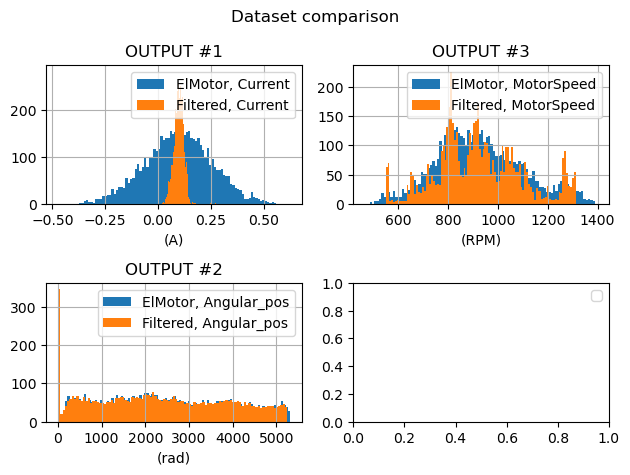

In [19]:
dmv.compare_datasets(ds,ds_filt,kind="coverage")

In [20]:
ds_filt.dataset

kind               INPUT    OUTPUT                          
names     Supply_Voltage   Current  Angular_pos   MotorSpeed
units                  V         A          rad          RPM
(Time, s)                                                   
0.00            4.586800  0.274500     0.000000   564.974100
0.01            4.586800  0.274500     0.000000   564.974100
0.02            4.582547  0.263883     0.000000   563.456572
0.03            4.608094  0.256565     0.000000   562.511588
0.04            4.716236  0.249524     0.000000   562.123673
...                  ...       ...          ...          ...
54.96          12.027472  0.103268  5246.586582  1154.597891
54.97          12.012242  0.098889  5247.883267  1153.290726
54.98          11.953694  0.094414  5248.658403  1151.997011
54.99          11.901889  0.091839  5250.236743  1150.449448
55.00          11.895429  0.089380  5251.983119  1149.163219

[5501 rows x 4 columns]